This jupyter notebook contains revised version of the Monthly Retail and Food Services Sales and Inventories datasets.
Below I load the various datasets, drop irrelevant columns and replace garbage values with meaningful values.


In [78]:
# Import the NumPy package
import numpy as np

# Import the Pandas package
import pandas as pd


In [104]:

xl = pd.ExcelFile("MyDatasets/mrtssales92-present.xlsx")
df = pd.DataFrame()
columns = None
for idx, name in enumerate(xl.sheet_names):
#     print(f'Reading sheet #{idx}: {name}')
    if idx == 0:
        continue
    sheet = xl.parse(name)
    sheet.set_index("Kind of Business", inplace=True)
    sheet = sheet.loc[["Retail and food services sales, total", "Retail sales, total", "Food and beverage stores", "Grocery stores", "Supermarkets and other grocery (except convenience) stores", "Beer, wine, and liquor stores", "Food services and drinking places", "Drinking places", "Restaurants and other eating places", "Full service restaurants", "Limited service eating places"]]
    # Assume index of existing data frame when appended
    df = df.append(sheet.T, ignore_index=False)

df.tail()

Reading sheet #0: 2020
Reading sheet #1: 2019
Reading sheet #2: 2018
Reading sheet #3: 2017
Reading sheet #4: 2016
Reading sheet #5: 2015
Reading sheet #6: 2014
Reading sheet #7: 2013
Reading sheet #8: 2012
Reading sheet #9: 2011
Reading sheet #10: 2010
Reading sheet #11: 2009
Reading sheet #12: 2008
Reading sheet #13: 2007
Reading sheet #14: 2006
Reading sheet #15: 2005
Reading sheet #16: 2004
Reading sheet #17: 2003
Reading sheet #18: 2002
Reading sheet #19: 2001
Reading sheet #20: 2000
Reading sheet #21: 1999
Reading sheet #22: 1998
Reading sheet #23: 1997
Reading sheet #24: 1996
Reading sheet #25: 1995
Reading sheet #26: 1994
Reading sheet #27: 1993
Reading sheet #28: 1992


Kind of Business,"Retail and food services sales, total","Retail and food services sales, total","Retail sales, total","Retail sales, total",Food and beverage stores,Food and beverage stores,Grocery stores,Grocery stores,Supermarkets and other grocery (except convenience) stores,"Beer, wine, and liquor stores",Food services and drinking places,Food services and drinking places,Drinking places,Restaurants and other eating places,Full service restaurants,Limited service eating places
Sep. 1992,164617,169400,148158,152588,30162,30942,27475,28122,(NA),1770,16459,16812,958,14086,6921,7165
Oct. 1992,173655,170625,155987,153521,31407,31148,28583,28328,(NA),1882,17668,17104,1041,15138,7439,7699
Nov. 1992,171547,171003,154824,153583,30388,30992,27620,28184,(NA),1831,16723,17420,999,14323,7114,7209
Dec. 1992,208838,173105,191347,155614,34170,31057,30294,28233,(NA),2511,17491,17491,1034,14994,7329,7665
1992TOTAL,2014102,NaN,1811237,NaN,370513,NaN,337370,NaN,(NA),21687,202865,NaN,12281,173468,86208,87260


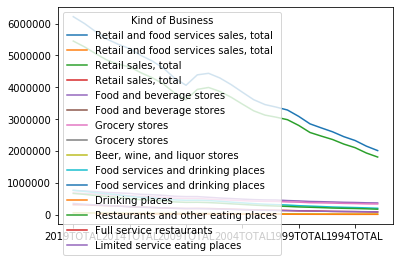

In [110]:
#Line graph of Annual total sales in food industries from 1992-2019

filter_col = [col for col in df.T if col.endswith('TOTAL')]
df_total = df.T[filter_col]
df_total.T.plot.line()


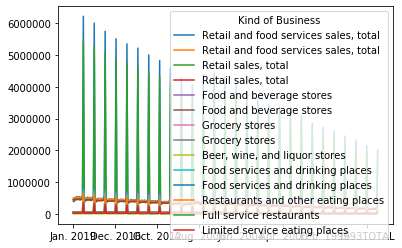

In [112]:
#Line graph of total sales in food industries by month from 1992-2019
df.plot.line()

In [84]:
# df = pd.ExcelFile("MyDatasets/mrtssales92-present.xlsx")
dfs = pd.read_excel("MyDatasets/mrtssales92-present.xlsx")
dfs.head()


,Kind of Business,Jan. 2020,Feb. 2020,Mar. 2020,Apr. 2020,May 2020,Jun. 2020,Jul. 2020,Aug. 2020,Sep. 2020(p),CY CUM,PY CUM
0,NOT ADJUSTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Retail and food services sales, total",481862,479868,481513,410345,508221,537022,552045,550342,534013,4535231.0,4565731.0
2,Retail sales and food services excl motor vehi...,388594,382009,398836,340412,399954,421725,434976,433626,420428,3620560.0,3636627.0
3,Retail sales and food services excl gasoline s...,442922,443605,447927,384063,476790,501411,513906,512376,497458,4220458.0,4189194.0
4,Retail sales and food services excl motor vehi...,349654,345746,365250,314130,368523,386114,396837,395660,383873,3305787.0,3260090.0


In [71]:
dfs.set_index("Kind of Business", inplace=True)

,Jan. 2020,Feb. 2020,Mar. 2020,Apr. 2020,May 2020,Jun. 2020,Jul. 2020,Aug. 2020,Sep. 2020(p),CY CUM,PY CUM
Kind of Business,,,,,,,,,,,
NOT ADJUSTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Retail and food services sales, total",481862,479868,481513,410345,508221,537022,552045,550342,534013,4535231.0,4565731.0
Retail sales and food services excl motor vehicle and parts,388594,382009,398836,340412,399954,421725,434976,433626,420428,3620560.0,3636627.0
Retail sales and food services excl gasoline stations,442922,443605,447927,384063,476790,501411,513906,512376,497458,4220458.0,4189194.0
Retail sales and food services excl motor vehicle and parts and gasoline stations,349654,345746,365250,314130,368523,386114,396837,395660,383873,3305787.0,3260090.0
...,...,...,...,...,...,...,...,...,...,...,...
"(2) Estimates are adjusted for seasonal variations and holiday and trading-day differences, but not for price changes. Cumulative seasonally adjusted sales estimates are not tabulated.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Note: Estimates are not adjusted for price changes. Retail and food services total and other subsector totals may include data for kinds of business not shown.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# df_food = dfs[dfs['Kind of Business']=='Retail and food services sales, total']
df_food = dfs.loc[["Retail and food services sales, total", "Retail sales, total", "Food and beverage stores", "Grocery stores", "Supermarkets and other grocery (except convenience) stores", "Beer, wine, and liquor stores", "Food services and drinking places", "Drinking places", "Restaurants and other eating places", "Full service restaurants", "Limited service eating places"]]
df_food

,Jan. 2020,Feb. 2020,Mar. 2020,Apr. 2020,May 2020,Jun. 2020,Jul. 2020,Aug. 2020,Sep. 2020(p),CY CUM,PY CUM
Kind of Business,,,,,,,,,,,
"Retail and food services sales, total",481862,479868,481513,410345,508221,537022,552045,550342,534013,4535231.0,4565731.0
"Retail and food services sales, total",529616,527273,483949,412766,488218,529962,535923,543404,551934,NaN,NaN
"Retail sales, total",421093,417777,434185,380223,465913,485930,497941,494467,479757,4077286.0,3992351.0
"Retail sales, total",464062,461914,438221,382734,448788,479823,483699,488998,496230,NaN,NaN
Food and beverage stores,63590,60983,79859,70115,75358,70808,74060,71363,68914,635050.0,566579.0
Food and beverage stores,64384,64329,81607,71116,72658,71502,71751,70780,70897,NaN,NaN
Grocery stores,57667,54814,72608,63230,67124,62756,65617,63293,61080,568189.0,507607.0
Grocery stores,57495,57337,73714,63869,64667,63454,63768,62666,62775,NaN,NaN
Supermarkets and other grocery (except convenience) stores,55178,52341,70095,61049,64517,60109,62808,60475,58440,545012.0,483732.0
